In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
df=pd.read_csv('pima-indians-diabetes_label.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnancies        768 non-null    int64  
 1   Glucose            768 non-null    int64  
 2   BloodPressure      768 non-null    int64  
 3   SkinThickness      768 non-null    int64  
 4   Insulin            768 non-null    int64  
 5   BMI                768 non-null    float64
 6   DiabetesPedigreeF  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Outcome            768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.3)

In [8]:
model=Sequential([
    Dense(50,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(100,activation='relu'),
    Dense(1,activation='sigmoid')])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5,651
Trainable params: 5,651
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history=model.fit(X_train,y_train,batch_size=200,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
3/3 [==============================] - 3s 108ms/step - loss: 1.0859 - accuracy: 0.5493 - val_loss: 0.9077 - val_accuracy: 0.4632
Epoch 2/10
3/3 [==============================] - 0s 15ms/step - loss: 0.8739 - accuracy: 0.5158 - val_loss: 0.8180 - val_accuracy: 0.6147
Epoch 3/10
3/3 [==============================] - 0s 18ms/step - loss: 0.7349 - accuracy: 0.6816 - val_loss: 0.7969 - val_accuracy: 0.6104
Epoch 4/10
3/3 [==============================] - 0s 17ms/step - loss: 0.6526 - accuracy: 0.6778 - val_loss: 0.7465 - val_accuracy: 0.5931
Epoch 5/10
3/3 [==============================] - 0s 14ms/step - loss: 0.6445 - accuracy: 0.6685 - val_loss: 0.7744 - val_accuracy: 0.6147
Epoch 6/10
3/3 [==============================] - 0s 14ms/step - loss: 0.6477 - accuracy: 0.6983 - val_loss: 0.7520 - val_accuracy: 0.6104
Epoch 7/10
3/3 [==============================] - 0s 14ms/step - loss: 0.6148 - accuracy: 0.6927 - val_loss: 0.7458 - val_accuracy: 0.6234
Epoch 8/10
3/3 [==========

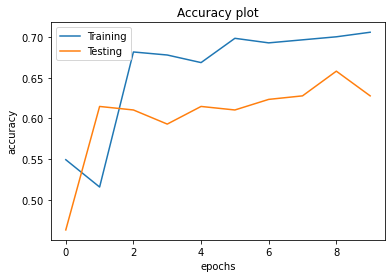

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy plot')
plt.legend(['Training','Testing'])

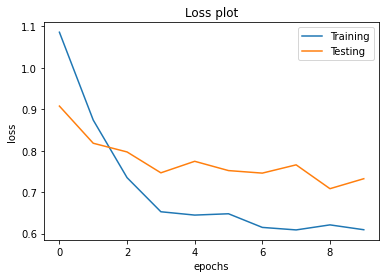

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss plot')
plt.legend(['Training','Testing'])